# Model and Parameters Selections

In [ ]:
!pip install statsmodels
!pip install pandas

In [ ]:
import pandas
# Make a dictionary of data for boot sizes
# and harness sizes in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40,
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41,
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37,
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
# In normal python we would write
# print(dataset)
# but in Jupyter notebooks, we simply write the name
# of the variable and it is printed nicely
dataset

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


In [ ]:
# Load a library to do the hard work for us
import statsmodels.formula.api as smf

# First, we define our formula using a special syntax
# This says that boot_size is explained by harness_size
formula = "boot_size ~ harness_size"

# Create the model, but don't train it yet
model = smf.ols(formula = formula, data = dataset)

# Note that we have created our model but it does not
# have internal parameters set yet
if not hasattr(model, 'params'):
    print("Model selected but it does not have parameters set. We need to train it!")

Model selected but it does not have parameters set. We need to train it!


In [ ]:
# Train (fit) the model so that it creates a line that
# fits our data. This method does the hard work for
# us. We will look at how this method works in a later unit.
fitted_model = model.fit()

# Print information about our model now it has been fit
print("The following model parameters have been found:\n" +
        f"Line slope: {fitted_model.params[1]}\n"+
        f"Line Intercept: {fitted_model.params[0]}")

The following model parameters have been found:
Line slope: 0.585925416738271
Line Intercept: 5.71910981268259


<ipython-input-4-37f0ef022f34>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Line slope: {fitted_model.params[1]}\n"+
<ipython-input-4-37f0ef022f34>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"Line Intercept: {fitted_model.params[0]}")


In [ ]:
!pip install matplotlib

<ipython-input-6-80bddd442982>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset["harness_size"] + fitted_model.params[0], 'r', label='Fitted line')


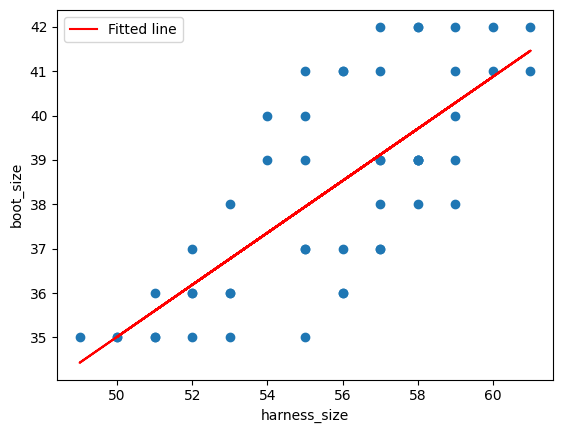

In [ ]:
import matplotlib.pyplot as plt

# Show a scatter plot of the data points and add the fitted line
# Don't worry about how this works for now
plt.scatter(dataset["harness_size"], dataset["boot_size"])
plt.plot(dataset["harness_size"], fitted_model.params[1] * dataset["harness_size"] + fitted_model.params[0], 'r', label='Fitted line')

# add labels and legend
plt.xlabel("harness_size")
plt.ylabel("boot_size")
plt.legend()

In [ ]:
# harness_size states the size of the harness we are interested in
harness_size = { 'harness_size' : [52.5] }

# Use the model to predict what size of boots the dog will fit
approximate_boot_size = fitted_model.predict(harness_size)

# Print the result
print("Estimated approximate_boot_size:")
print(approximate_boot_size[0])

Estimated approximate_boot_size:
36.48019419144182


# Input and Output

In [ ]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv

# Read the text file containing data using pandas
dataset = pandas.read_csv('doggy-boot-harness.csv')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head()

--2024-09-13 17:35:58--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py’

graphing.py         100%[===================>]  21.01K  --.-KB/s    in 0.001s  

2024-09-13 17:35:58 (14.4 MB/s) - ‘graphing.py’ saved [21511/21511]

--2024-09-13 17:35:58--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-boot-harness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sen

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['boot_size'].plot(kind='hist', bins=20, title='boot_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['harness_size'].plot(kind='hist', bins=20, title='harness_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['age_years'].plot(kind='hist', bins=20, title='age_years')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='boot_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='boot_size', y='harness_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='harness_size', y='age_years', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['boot_size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('boot_size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['harness_size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('harness_size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['age_years']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('age_years')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['boot_size'].plot(kind='line', figsize=(8, 4), title='boot_size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['harness_size'].plot(kind='line', figsize=(8, 4), title='harness_size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['age_years'].plot(kind='line', figsize=(8, 4), title='age_years')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='boot_size', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='harness_size', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='age_years', y='sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:

# Look at the harness sizes
print("Harness sizes")
print(dataset.harness_size)

# Remove the sex and age-in-years columns.
del dataset["sex"]
del dataset["age_years"]

# Print the column names
print("\nAvailable columns after deleting sex and age information:")
print(dataset.columns.values)


Harness sizes
0     58
1     58
2     52
3     58
4     57
5     52
6     55
7     53
8     49
9     54
10    59
11    56
12    53
13    58
14    57
15    58
16    56
17    51
18    50
19    59
20    59
21    59
22    55
23    50
24    55
25    52
26    53
27    54
28    61
29    56
30    55
31    60
32    57
33    56
34    61
35    58
36    53
37    57
38    57
39    55
40    60
41    51
42    52
43    56
44    55
45    57
46    58
47    57
48    51
49    59
Name: harness_size, dtype: int64

Available columns after deleting sex and age information:
['boot_size' 'harness_size']


In [ ]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
   boot_size  harness_size
0         39            58
1         38            58
2         37            52
3         39            58
4         38            57

BOTTOM OF TABLE
    boot_size  harness_size
45         41            57
46         39            58
47         39            57
48         35            51
49         39            59


In [ ]:
# Print how many rows of data we have
print(f"We have {len(dataset)} rows of data")

# Determine whether each avalanche dog's harness size is < 55
# This creates a True or False value for each row where True means
# they are smaller than 55
is_small = dataset.harness_size < 55
print("\nWhether the dog's harness was smaller than size 55:")
print(is_small)

# Now apply this 'mask' to our data to keep the smaller dogs
data_from_small_dogs = dataset[is_small]
print("\nData for dogs with harness smaller than size 55:")
print(data_from_small_dogs)

# Print the number of small dogs
print(f"\nNumber of dogs with harness size less than 55: {len(data_from_small_dogs)}")

We have 50 rows of data

Whether the dog's harness was smaller than size 55:
0     False
1     False
2      True
3     False
4     False
5      True
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17     True
18     True
19    False
20    False
21    False
22    False
23     True
24    False
25     True
26     True
27     True
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36     True
37    False
38    False
39    False
40    False
41     True
42     True
43    False
44    False
45    False
46    False
47    False
48     True
49    False
Name: harness_size, dtype: bool

Data for dogs with harness smaller than size 55:
    boot_size  harness_size
2          37            52
5          35            52
7          36            53
8          35            49
9          40            54
12         38            53
17         36            51
18         35    

In [ ]:
# Make a copy of the dataset that only contains dogs with
# a boot size below size 40
# The call to copy() is optional but can help avoid unexpected
# behaviour in more complex scenarios
data_smaller_paws = dataset[dataset.boot_size < 40].copy()


# Print information about this
print(f"We now have {len(data_smaller_paws)} rows in our dataset. The last few rows are:")
data_smaller_paws.tail()

We now have 34 rows in our dataset. The last few rows are:


,boot_size,harness_size
42,36,52
46,39,58
47,39,57
48,35,51
49,39,59


Text(0, 0.5, 'boot_size')

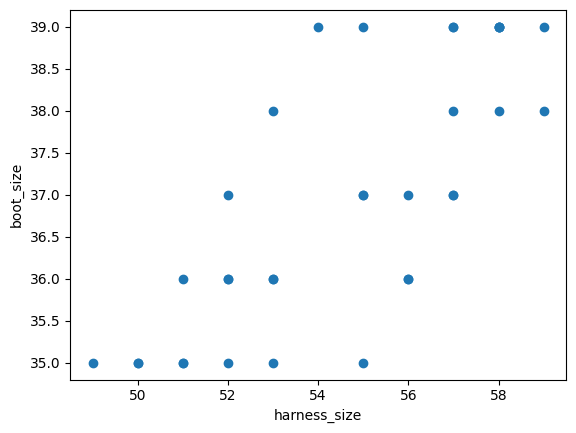

In [ ]:
# Load and prepare matplotlib to use for plotting graphs
import matplotlib.pyplot as plt


# Show a graph of harness size by boot size:
plt.scatter(data_smaller_paws["harness_size"], data_smaller_paws["boot_size"])

# add labels
plt.xlabel("harness_size")
plt.ylabel("boot_size")

Text(0, 0.5, 'boot_size')

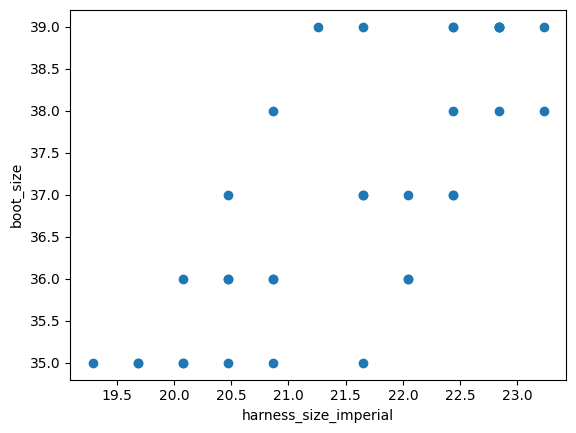

In [ ]:
# Convert harness sizes from metric to imperial units
# and save the result to a new column
data_smaller_paws['harness_size_imperial'] = data_smaller_paws.harness_size / 2.54

# Show a graph of harness size in imperial units
plt.scatter(data_smaller_paws["harness_size_imperial"], data_smaller_paws["boot_size"])
plt.xlabel("harness_size_imperial")
plt.ylabel("boot_size")

# Using ML Models

In [ ]:
# Load a file containing dog's boot and harness sizes
data = pandas.read_csv('doggy-boot-harness.csv')

# Print the first few rows
data.head()

,boot_size,harness_size,sex,age_years
0,39,58,male,12.0
1,38,58,male,9.6
2,37,52,female,8.6
3,39,58,male,10.2
4,38,57,male,7.8


In [ ]:
import statsmodels.formula.api as smf

# Fit a simple model that finds a linear relationship
# between boot size and harness size, which we can use later
# to predict a dog's boot size, given their harness size
model = smf.ols(formula = "boot_size ~ harness_size", data = data).fit()

print("Model trained!")

Model trained!


In [ ]:
import joblib

model_filename = './avalanche_dog_boot_model.pkl'
joblib.dump(model, model_filename)

print("Model saved!")

Model saved!


In [ ]:
model_loaded = joblib.load(model_filename)

print("We have loaded a model with the following parameters:")
print(model_loaded.params)

We have loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


In [ ]:
# Let's write a function that loads and uses our model
def load_model_and_predict(harness_size):
    '''
    This function loads a pretrained model. It uses the model
    with the customer's dog's harness size to predict the size of
    boots that will fit that dog.

    harness_size: The dog harness size, in cm
    '''

    # Load the model from file and print basic information about it
    loaded_model = joblib.load(model_filename)

    print("We've loaded a model with the following parameters:")
    print(loaded_model.params)

    # Prepare data for the model
    inputs = {"harness_size":[harness_size]}

    # Use the model to make a prediction
    predicted_boot_size = loaded_model.predict(inputs)[0]

    return predicted_boot_size

# Practice using our model
predicted_boot_size = load_model_and_predict(45)

print("Predicted dog boot size:", predicted_boot_size)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64
Predicted dog boot size: 32.08575356590479


Real world Use

In [ ]:
def check_size_of_boots(selected_harness_size, selected_boot_size):
    '''
    Calculates whether the customer has chosen a pair of doggy boots that
    are a sensible size. This works by estimating the dog's actual boot
    size from their harness size.

    This returns a message for the customer that should be shown before
    they complete their payment

    selected_harness_size: The size of the harness the customer wants to buy
    selected_boot_size: The size of the doggy boots the customer wants to buy
    '''

    # Estimate the customer's dog's boot size
    estimated_boot_size = load_model_and_predict(selected_harness_size)

    # Round to the nearest whole number because we don't sell partial sizes
    estimated_boot_size = int(round(estimated_boot_size))

    # Check if the boot size selected is appropriate
    if selected_boot_size == estimated_boot_size:
        # The selected boots are probably OK
        return f"Great choice! We think these boots will fit your avalanche dog well."

    if selected_boot_size < estimated_boot_size:
        # Selected boots might be too small
        return "The boots you have selected might be TOO SMALL for a dog as "\
               f"big as yours. We recommend a doggy boots size of {estimated_boot_size}."

    if selected_boot_size > estimated_boot_size:
        # Selected boots might be too big
        return "The boots you have selected might be TOO BIG for a dog as "\
               f"small as yours. We recommend a doggy boots size of {estimated_boot_size}."


# Practice using our new warning system
check_size_of_boots(selected_harness_size=55, selected_boot_size=39)

We've loaded a model with the following parameters:
Intercept       5.719110
harness_size    0.585925
dtype: float64


'The boots you have selected might be TOO BIG for a dog as small as yours. We recommend a doggy boots size of 38.'

---
# Supervised Learning

4 Components:-
1. The Data

In [ ]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv

# Load a file that contains weather data for Seattle
data = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

# Keep only January temperatures
data = data[[d.month == 1 for d in data.date]].copy()


# Print the first and last few rows
# Remember that with Jupyter notebooks, the last line of
# code is automatically printed
data

--2024-09-15 16:25:24--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0b_optimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1287 (1.3K) [text/plain]
Saving to: ‘m0b_optimizer.py’

m0b_optimizer.py    100%[===================>]   1.26K  --.-KB/s    in 0s      

2024-09-15 16:25:25 (65.2 MB/s) - ‘m0b_optimizer.py’ saved [1287/1287]

--2024-09-15 16:25:25--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connecte

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25229,2017-01-27,0.00,54,37,False
25230,2017-01-28,0.00,52,37,False
25231,2017-01-29,0.03,48,37,True
25232,2017-01-30,0.02,45,40,True


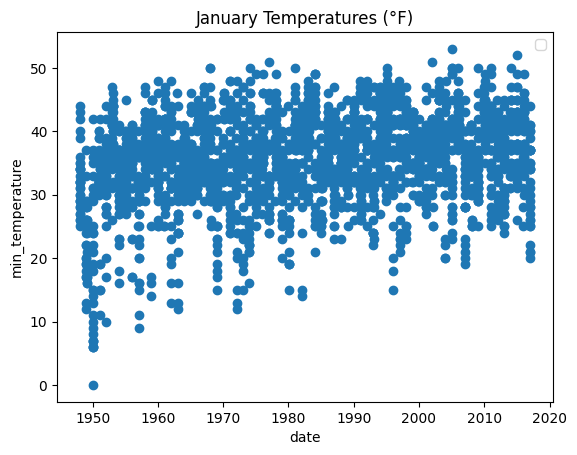

In [ ]:
import matplotlib.pyplot as plt

# Let's take a quick look at our data

plt.scatter(data["date"], data["min_temperature"])

# add labels and legend
plt.xlabel("date")
plt.ylabel("min_temperature")
plt.title("January Temperatures (°F)")
plt.legend()

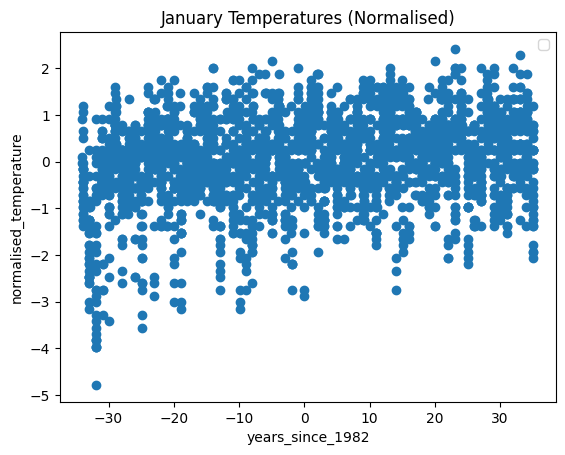

In [ ]:
import numpy as np

# This block of code scales and offsets the data slightly, which helps the training process
# You don't need to understand this code. We'll cover these concepts in later learning material

# Offset date into number of years since 1982
data["years_since_1982"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

# Scale and offset temperature so that it has a smaller range of values
data["normalised_temperature"] = (data["min_temperature"] - np.mean(data["min_temperature"])) / np.std(data["min_temperature"])

# Graph
plt.scatter(data["years_since_1982"], data["normalised_temperature"])
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.title("January Temperatures (Normalised)")
plt.legend()

2. The Model

Simple Linear Regression Model





In [ ]:
class MyModel:

    def __init__(self):
        '''
        Creates a new MyModel
        '''
        # Straight lines described by two parameters:
        # The slope is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0

    def predict(self, date):
        '''
        Estimates the temperature from the date
        '''
        return date * self.slope + self.intercept

# Create our model ready to be trained
model = MyModel()

print("Model made!")

Model made!


Model parameters before training: 0, 0
Model visualised before training:


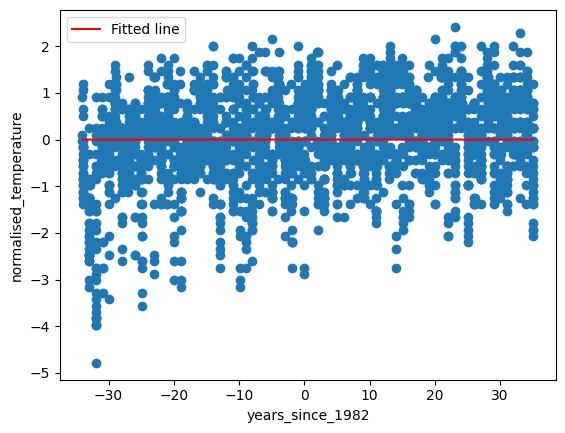

In [ ]:
print(f"Model parameters before training: {model.intercept}, {model.slope}")

# Look at how well the model does before training
print("Model visualised before training:")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')


# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()

3. The Objective Function

In [ ]:
def cost_function(actual_temperatures, estimated_temperatures):
    '''
    Calculates the difference between actual and estimated temperatures
    Returns the difference, and also returns the squared difference (the cost)

    actual_temperatures: One or more temperatures recorded in the past
    estimated_temperatures: Corresponding temperature(s) estimated by the model
    '''

    # Calculate the difference between actual temperatures and those
    # estimated by the model
    difference = estimated_temperatures - actual_temperatures

    # Convert to a single number that tells us how well the model did
    # (smaller numbers are better)
    cost = sum(difference ** 2)

    return difference, cost

4. The Optimizer

In [ ]:
from m0b_optimizer import MyOptimizer

# Create an optimizer
optimizer = MyOptimizer()

Putting them together

In [ ]:
def train_one_iteration(model_inputs, true_temperatures, last_cost:float):
    '''
    Runs a single iteration of training.


    model_inputs: One or more dates to provide the model (dates)
    true_temperatues: Corresponding temperatures known to occur on those dates

    Returns:
        A Boolean, as to whether training should continue
        The cost calculated (small numbers are better)
    '''

    # === USE THE MODEL ===
    # Estimate temperatures for all data that we have
    estimated_temperatures = model.predict(model_inputs)

    # === OBJECTIVE FUNCTION ===
    # Calculate how well the model is working
    # Smaller numbers are better
    difference, cost = cost_function(true_temperatures, estimated_temperatures)

    # Decide whether to keep training
    # We'll stop if the training is no longer improving the model effectively
    if cost >= last_cost:
        # Stop training
        return False, cost
    else:
        # === OPTIMIZER ===
        # Calculate updates to parameters
        intercept_update, slope_update = optimizer.get_parameter_updates(model_inputs, cost, difference)

        # Change the model parameters
        model.slope += slope_update
        model.intercept += intercept_update

        return True, cost

print("Training method ready")

Training method ready


In [ ]:
import math

print(f"Model parameters before training:\t\t{model.intercept:.8f},\t{model.slope:.8f}")

continue_loop, cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = math.inf)

print(f"Model parameters after 1 iteration of training:\t{model.intercept:.8f},\t{model.slope:.8f}")


Model parameters before training:		0.00000000,	0.00000000
Model parameters after 1 iteration of training:	0.00000000,	0.01006832


Training beginning...
Iteration: 0
Iteration: 400
Iteration: 800
Iteration: 1200
Iteration: 1600
Iteration: 2000
Iteration: 2400
Iteration: 2800
Iteration: 3200
Iteration: 3600
Iteration: 4000
Training complete!
Model parameters after training:	-0.00648846,	0.01193327


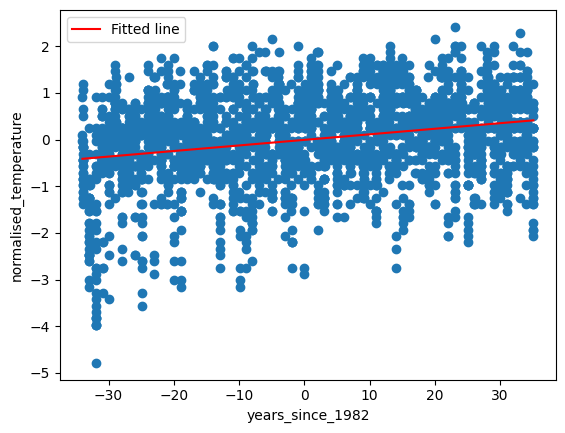

In [ ]:

# Start the loop
print("Training beginning...")
last_cost = math.inf
i = 0
continue_loop = True
while continue_loop:

    # Run one iteration of training
    # This will tell us whether to stop training, and also what
    # the cost was for this iteration
    continue_loop, last_cost = train_one_iteration(model_inputs = data["years_since_1982"],
                                                    true_temperatures = data["normalised_temperature"],
                                                    last_cost = last_cost)

    # Print the status
    if i % 400 == 0:
        print("Iteration:", i)

    i += 1


print("Training complete!")
print(f"Model parameters after training:\t{model.intercept:.8f},\t{model.slope:.8f}")

plt.scatter(data["years_since_1982"], data["normalised_temperature"])
plt.plot(data["years_since_1982"], model.predict(data["years_since_1982"]), 'r', label='Fitted line')

# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.legend()

Comparing 2 cost functions

In [ ]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/microsoft_custom_linear_regressor.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
from datetime import datetime

# Load a file that contains our weather data
dataset = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

# Convert the dates into numbers so we can use them in our models
# We make a year column that can contain fractions. For example,
# 1948.5 is halfway through the year 1948
dataset["year"] = [(d.year + d.timetuple().tm_yday / 365.25) for d in dataset.date]


# For the sake of this exercise, let's look at February 1 for the following years:
desired_dates = [
    datetime(1950,2,1),
    datetime(1960,2,1),
    datetime(1970,2,1),
    datetime(1980,2,1),
    datetime(1990,2,1),
    datetime(2000,2,1),
    datetime(2010,2,1),
    datetime(2017,2,1),
]

dataset = dataset[dataset.date.isin(desired_dates)].copy()

# Print the dataset
dataset


--2024-09-15 17:09:29--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/microsoft_custom_linear_regressor.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2167 (2.1K) [text/plain]
Saving to: ‘microsoft_custom_linear_regressor.py.2’

microsoft_custom_li 100%[===================>]   2.12K  --.-KB/s    in 0s      

2024-09-15 17:09:29 (30.5 MB/s) - ‘microsoft_custom_linear_regressor.py.2’ saved [2167/2167]

--2024-09-15 17:09:29--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.

,date,amount_of_precipitation,max_temperature,min_temperature,rain,year
762,1950-02-01,0.00,27,1,False,1950.087611
4414,1960-02-01,0.15,52,44,True,1960.087611
8067,1970-02-01,0.00,50,42,False,1970.087611
11719,1980-02-01,0.37,54,36,True,1980.087611
15372,1990-02-01,0.08,45,37,True,1990.087611
19024,2000-02-01,1.34,49,41,True,2000.087611
22677,2010-02-01,0.08,49,40,True,2010.087611
25234,2017-02-01,0.00,43,29,False,2017.087611


In [ ]:
import numpy

def sum_of_square_differences(estimate, actual):
    # Note that with NumPy, to square each value we use **
    return numpy.sum((estimate - actual)**2)

def sum_of_absolute_differences(estimate, actual):
    return numpy.sum(numpy.abs(estimate - actual))

In [ ]:
actual_label = numpy.array([1, 3])
model_estimate = numpy.array([2, 2])

print("SSD:", sum_of_square_differences(model_estimate, actual_label))
print("SAD:", sum_of_absolute_differences(model_estimate, actual_label))

SSD: 2
SAD: 2


In [ ]:
actual_label = numpy.array([1, 3])
model_estimate = numpy.array([1, 1])

print("SSD:", sum_of_square_differences(model_estimate, actual_label))
print("SAD:", sum_of_absolute_differences(model_estimate, actual_label))

SSD: 4
SAD: 2


Difference in Action
1. SSD (Sum of Square Differences)

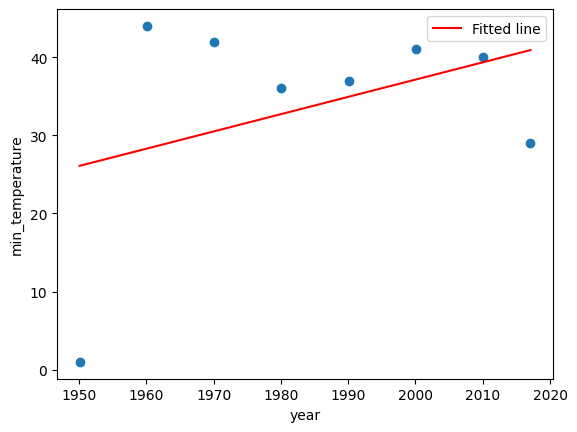

In [ ]:
from microsoft_custom_linear_regressor import MicrosoftCustomLinearRegressor
import matplotlib.pyplot as plt

# Create and fit the model
# We use a custom object that we've hidden from this notebook, because
# you don't need to understand its details. This fits a linear model
# by using a provided cost function

# Fit a model by using sum of square differences
model = MicrosoftCustomLinearRegressor().fit(X = dataset.year,
                                             y = dataset.min_temperature,
                                             cost_function = sum_of_square_differences)

# Graph the model
plt.scatter(dataset["year"], dataset["min_temperature"])
plt.plot(dataset["year"], model.predict(dataset["year"]), 'r', label='Fitted line')


# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.legend()

2. SAD (Sum of Absolute Difference)

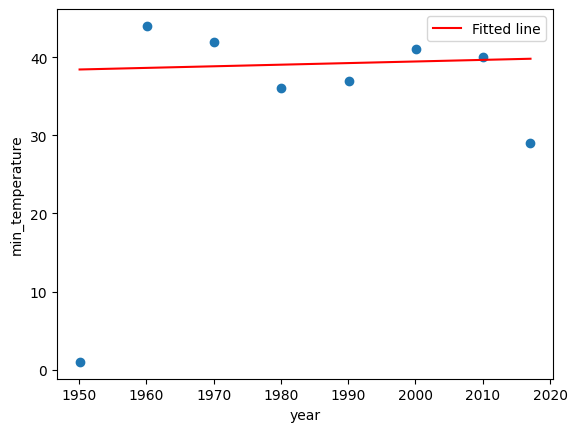

In [ ]:
# Fit a model with SAD
# Fit a model by using sum of absolute differences
model = MicrosoftCustomLinearRegressor().fit(X = dataset.year,
                                             y = dataset.min_temperature,
                                             cost_function = sum_of_absolute_differences)

# Graph the model
plt.scatter(dataset["year"], dataset["min_temperature"])
plt.plot(dataset["year"], model.predict(dataset["year"]), 'r', label='Fitted line')


# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.legend()


# Gradient Descent

> Loading data and preparing model



--2024-09-15 18:00:15--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 762017 (744K) [text/plain]
Saving to: ‘seattleWeather_1948-2017.csv.4’

seattleWeather_1948 100%[===================>] 744.16K  --.-KB/s    in 0.06s   

2024-09-15 18:00:15 (12.5 MB/s) - ‘seattleWeather_1948-2017.csv.4’ saved [762017/762017]



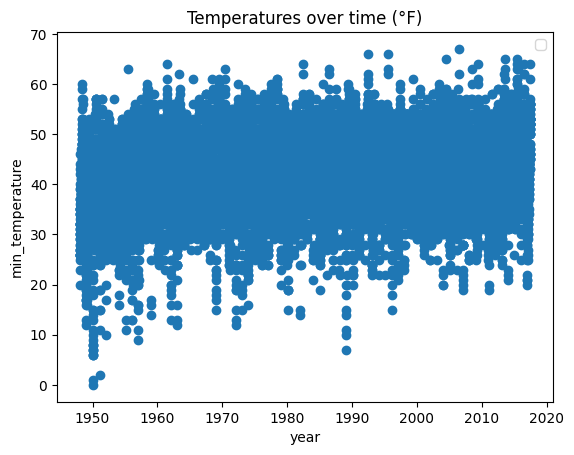

In [ ]:
from datetime import datetime
import pandas
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv

# Load a file that contains weather data for Seattle
data = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])

# Remove all dates after July 1 because we have to to plant onions before summer begins
data = data[[d.month < 7 for d in data.date]].copy()


# Convert the dates into numbers so we can use them in our models
# We make a year column that can contain fractions. For example,
# 1948.5 is halfway through the year 1948
data["year"] = [(d.year + d.timetuple().tm_yday / 365.25) for d in data.date]

# Let's take a quick look at our data
plt.scatter(data["year"], data["min_temperature"])

# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.title("Temperatures over time (°F)")
plt.legend()



> Fitting a Model



In [ ]:
import statsmodels.formula.api as smf

# Perform linear regression to fit a line to our data
# NB OLS uses the sum or mean of squared differences as a cost function,
# which we're familiar with from our last exercise
model = smf.ols(formula = "min_temperature ~ year", data = data).fit()

# Print the model
intercept = model.params[0]
slope = model.params[1]

print(f"The model is: y = {slope:0.3f} * X + {intercept:0.3f}")

The model is: y = 0.063 * X + -83.073


<ipython-input-28-7eaf091ff749>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model.params[0]
<ipython-input-28-7eaf091ff749>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model.params[1]




> Model Selection



In [ ]:
class MyModel:

    def __init__(self):
        '''
        Creates a new MyModel
        '''
        # Straight lines described by two parameters:
        # The slope is the angle of the line
        self.slope = 0
        # The intercept moves the line up or down
        self.intercept = 0

    def predict(self, date):
        '''
        Estimates the temperature from the date
        '''
        return date * self.slope + self.intercept

    def get_summary(self):
        '''
        Returns a string that summarises the model
        '''
        return f"y = {self.slope} * x + {self.intercept}"

print("Model class ready")

Model class ready


>Implementing Gradient Descent



In [ ]:
import numpy as np

x = data.year
temperature_true = data.min_temperature

# Here, we set:
#   x to a range of potential model intercepts
#   y to a range of potential model slopes
#   z as the cost for that combination of model parameters

# Choose a range of intercepts and slopes values
intercepts = np.linspace(-100,-70,10)
slopes = np.linspace(0.060,0.07,10)


# Set a cost function. This will be the mean of squared differences
def cost_function(temperature_estimate):
    """
    Calculates cost for a given temperature estimate
    Our cost function is the mean of squared differences (a.k.a. mean squared error)
    """
    # Note that with NumPy to square each value, we use **
    return np.mean((temperature_true - temperature_estimate) ** 2)

def predict_and_calc_cost(intercept, slope):
    '''
    Uses the model to make a prediction, then calculates the cost
    '''

    # Predict temperature by using these model parameters
    temperature_estimate = x * slope + intercept

    # Calculate cost
    return cost_function(temperature_estimate)

def calculate_gradient(temperature_estimate):
    """
    This calculates the gradient for a linear regession
    by using the Mean Squared Error cost function
    """

    # The partial derivatives of MSE are as follows
    # You don't need to be able to do this just yet, but
    # it's important to note that these give you the two gradients
    # that we need to train our model
    error = temperature_estimate - temperature_true
    grad_intercept = np.mean(error) * 2
    grad_slope = (x * error).mean() * 2

    return grad_intercept, grad_slope

print("Function is ready!")

Function is ready!


In [ ]:
def gradient_descent(learning_rate, number_of_iterations):
    """
    Performs gradient descent for a one-variable function.

    learning_rate: Larger numbers follow the gradient more aggressively
    number_of_iterations: The maximum number of iterations to perform
    """

    # Our starting guess is y = 0 * x - 83
    # We're going to start with the correct intercept so that
    # only the line's slope is estimated. This is just to keep
    # things simple for this exercise
    model = MyModel()
    model.intercept = -83
    model.slope = 0

    for i in range(number_of_iterations):
        # Calculate the predicted values
        predicted_temperature = model.predict(x)

        # == OPTIMIZER ===
        # Calculate the gradient
        _, grad_slope = calculate_gradient(predicted_temperature)
        # Update the estimation of the line
        model.slope -= learning_rate * grad_slope

        # Print the current estimation and cost every 100 iterations
        if( i % 100 == 0):
            estimate = model.predict(x)
            cost = cost_function(estimate)
            print("Next estimate:", model.get_summary(), f"Cost: {cost}")

    # Print the final model
    print(f"Final estimate:", model.get_summary())

# Run gradient descent
gradient_descent(learning_rate=1E-9, number_of_iterations=1000)

Next estimate: y = 0.0004946403321335815 * x + -83 Cost: 15374.064817888926
Next estimate: y = 0.034564263954523125 * x + -83 Cost: 3218.050332426434
Next estimate: y = 0.050035120236006536 * x + -83 Cost: 711.4491469584532
Next estimate: y = 0.057060363506525755 * x + -83 Cost: 194.58159053167708
Next estimate: y = 0.060250493523378544 * x + -83 Cost: 88.00218235322349
Next estimate: y = 0.06169911660055105 * x + -83 Cost: 66.02523660294695
Next estimate: y = 0.06235692954504888 * x + -83 Cost: 61.4935343467107
Next estimate: y = 0.0626556393176375 * x + -83 Cost: 60.559085785362484
Next estimate: y = 0.06279128202425543 * x + -83 Cost: 60.36640010911254
Next estimate: y = 0.06285287674109104 * x + -83 Cost: 60.32666783130979
Final estimate: y = 0.06288066221361607 * x + -83




-------

